In [52]:
install.packages('AmesHousing')
install.packages('ggpubr')



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [23]:
install.packages('IRkernel')
IRkernel::installspec()  # to register the kernel in the current R installation


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [45]:
library(AmesHousing)

# Helper packages
library(dplyr)     # for data manipulation
library(ggplot2)   # for awesome graphics
library(ggpubr)

# Modeling process packages
library(rsample)   # for resampling procedures
library(caret)     # for resampling and model training
library(h2o)       # for resampling and model training
library(recipes)  # for feature engineering tasks


# h2o set-up 
h2o.no_progress()  # turn off h2o progress bars
h2o.init()         # launch h2o


Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step




 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 days 3 hours 
    H2O cluster timezone:       America/Montevideo 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.30.1.2 
    H2O cluster version age:    24 days  
    H2O cluster name:           H2O_started_from_R_cesar_jro824 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.22 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 3.6.3 (2020-02-29) 



In [5]:
# Ames housing data
ames <- AmesHousing::make_ames()
ames.h2o <- as.h2o(ames)

In [24]:
# initial dimension
dim(ames)
## [1] 2930   81

# response variable
head(ames$Sale_Price)

[1] 2930   81

[1] 215000 105000 172000 244000 189900 195500

In [25]:
head(ames)

MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,⋯,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078


In [8]:
names(ames) 

[1] "MS_SubClass"        "MS_Zoning"          "Lot_Frontage"      
 [4] "Lot_Area"           "Street"             "Alley"             
 [7] "Lot_Shape"          "Land_Contour"       "Utilities"         
[10] "Lot_Config"         "Land_Slope"         "Neighborhood"      
[13] "Condition_1"        "Condition_2"        "Bldg_Type"         
[16] "House_Style"        "Overall_Qual"       "Overall_Cond"      
[19] "Year_Built"         "Year_Remod_Add"     "Roof_Style"        
[22] "Roof_Matl"          "Exterior_1st"       "Exterior_2nd"      
[25] "Mas_Vnr_Type"       "Mas_Vnr_Area"       "Exter_Qual"        
[28] "Exter_Cond"         "Foundation"         "Bsmt_Qual"         
[31] "Bsmt_Cond"          "Bsmt_Exposure"      "BsmtFin_Type_1"    
[34] "BsmtFin_SF_1"       "BsmtFin_Type_2"     "BsmtFin_SF_2"      
[37] "Bsmt_Unf_SF"        "Total_Bsmt_SF"      "Heating"           
[40] "Heating_QC"         "Central_Air"        "Electrical"        
[43] "First_Flr_SF"       "Second_Flr_SF"      "Low_Qual_Fin_SF"   
[46] "Gr_Liv_Area"        "Bsmt_Full_Bath"     "Bsmt_Half_Bath"    
[49] "Full_Bath"          "Half_Bath"          "Bedroom_AbvGr"     
[52] "Kitchen_AbvGr"      "Kitchen_Qual"       "TotRms_AbvGrd"     
[55] "Functional"         "Fireplaces"         "Fireplace_Qu"      
[58] "Garage_Type"        "Garage_Finish"      "Garage_Cars"       
[61] "Garage_Area"        "Garage_Qual"        "Garage_Cond"       
[64] "Paved_Drive"        "Wood_Deck_SF"       "Open_Porch_SF"     
[67] "Enclosed_Porch"     "Three_season_porch" "Screen_Porch"      
[70] "Pool_Area"          "Pool_QC"            "Fence"             
[73] "Misc_Feature"       "Misc_Val"           "Mo_Sold"           
[76] "Year_Sold"          "Sale_Type"          "Sale_Condition"    
[79] "Sale_Price"         "Longitude"          "Latitude"

In [26]:
?createDataPartition

In [27]:
# Using base R
set.seed(123)  # for reproducibility
index_1 <- sample(1:nrow(ames), round(nrow(ames) * 0.7))
train_1 <- ames[index_1, ]
test_1  <- ames[-index_1, ]

# Using caret package
set.seed(123)  # for reproducibility
index_2 <- createDataPartition(ames$Sale_Price, p = 0.7, 
                               list = FALSE, )
train_2 <- ames[index_2, ]
test_2  <- ames[-index_2, ]

# Using rsample package
set.seed(123)  # for reproducibility
split_1  <- initial_split(ames, prop = 0.7, strata = Sale_Price)
train_3  <- training(split_1)
test_3   <- testing(split_1)

# Using h2o package
split_2 <- h2o.splitFrame(ames.h2o, ratios = 0.7, 
                          seed = 123)
train_4 <- split_2[[1]]
test_4  <- split_2[[2]]

In [28]:
options(repr.plot.width  = 15,
        repr.plot.height = 10)

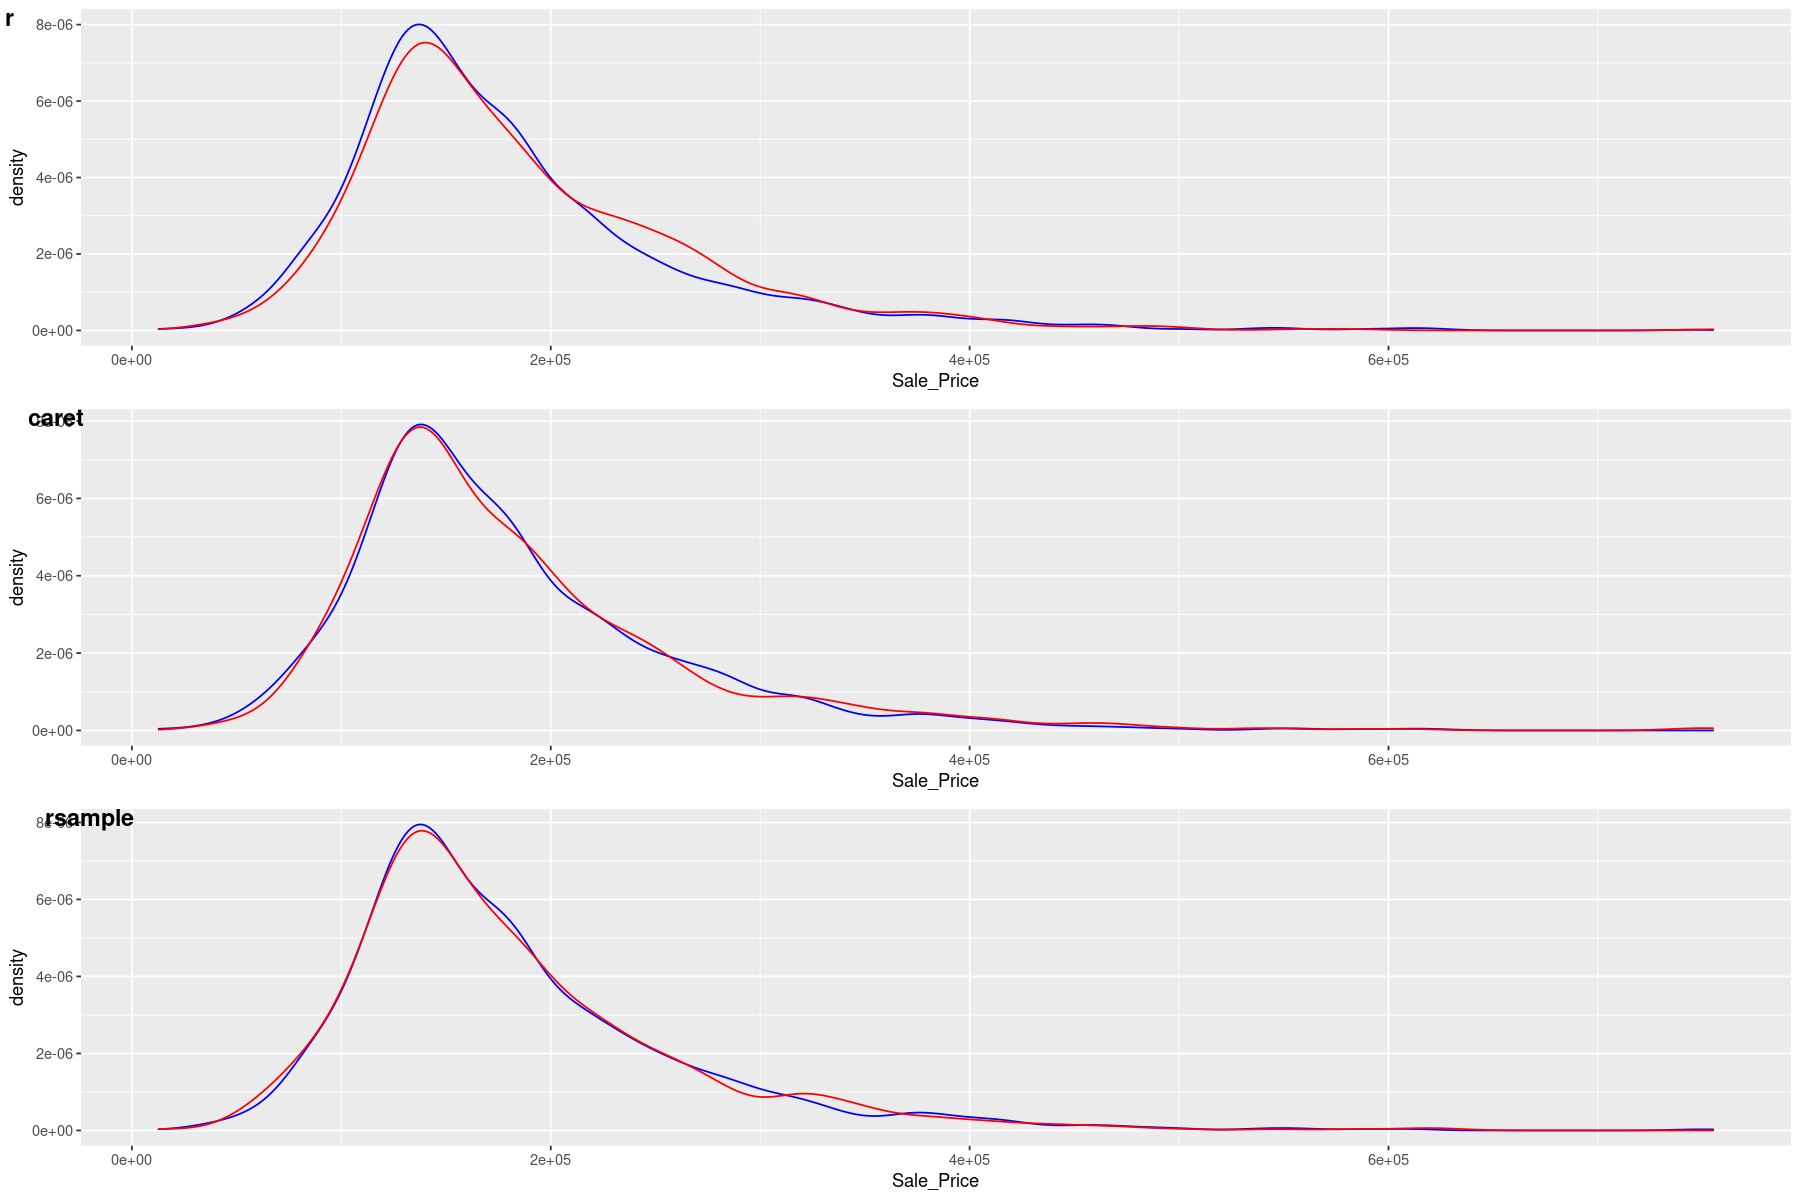

In [29]:
fig1 <- ggplot() + 
    geom_density(data=train_1, aes(Sale_Price), color='blue') + 
    geom_density(data=test_1, aes(Sale_Price), color='red')

fig2 <- ggplot() + 
    geom_density(data=train_2, aes(Sale_Price), color='blue') + 
    geom_density(data=test_2, aes(Sale_Price), color='red')

fig3 <- ggplot() + 
    geom_density(data=train_3, aes(Sale_Price), color='blue') + 
    geom_density(data=test_3, aes(Sale_Price), color='red')

ggarrange(fig1, fig2, fig3, labels = c("r", "caret", "rsample"), ncol = 1, nrow = 3)

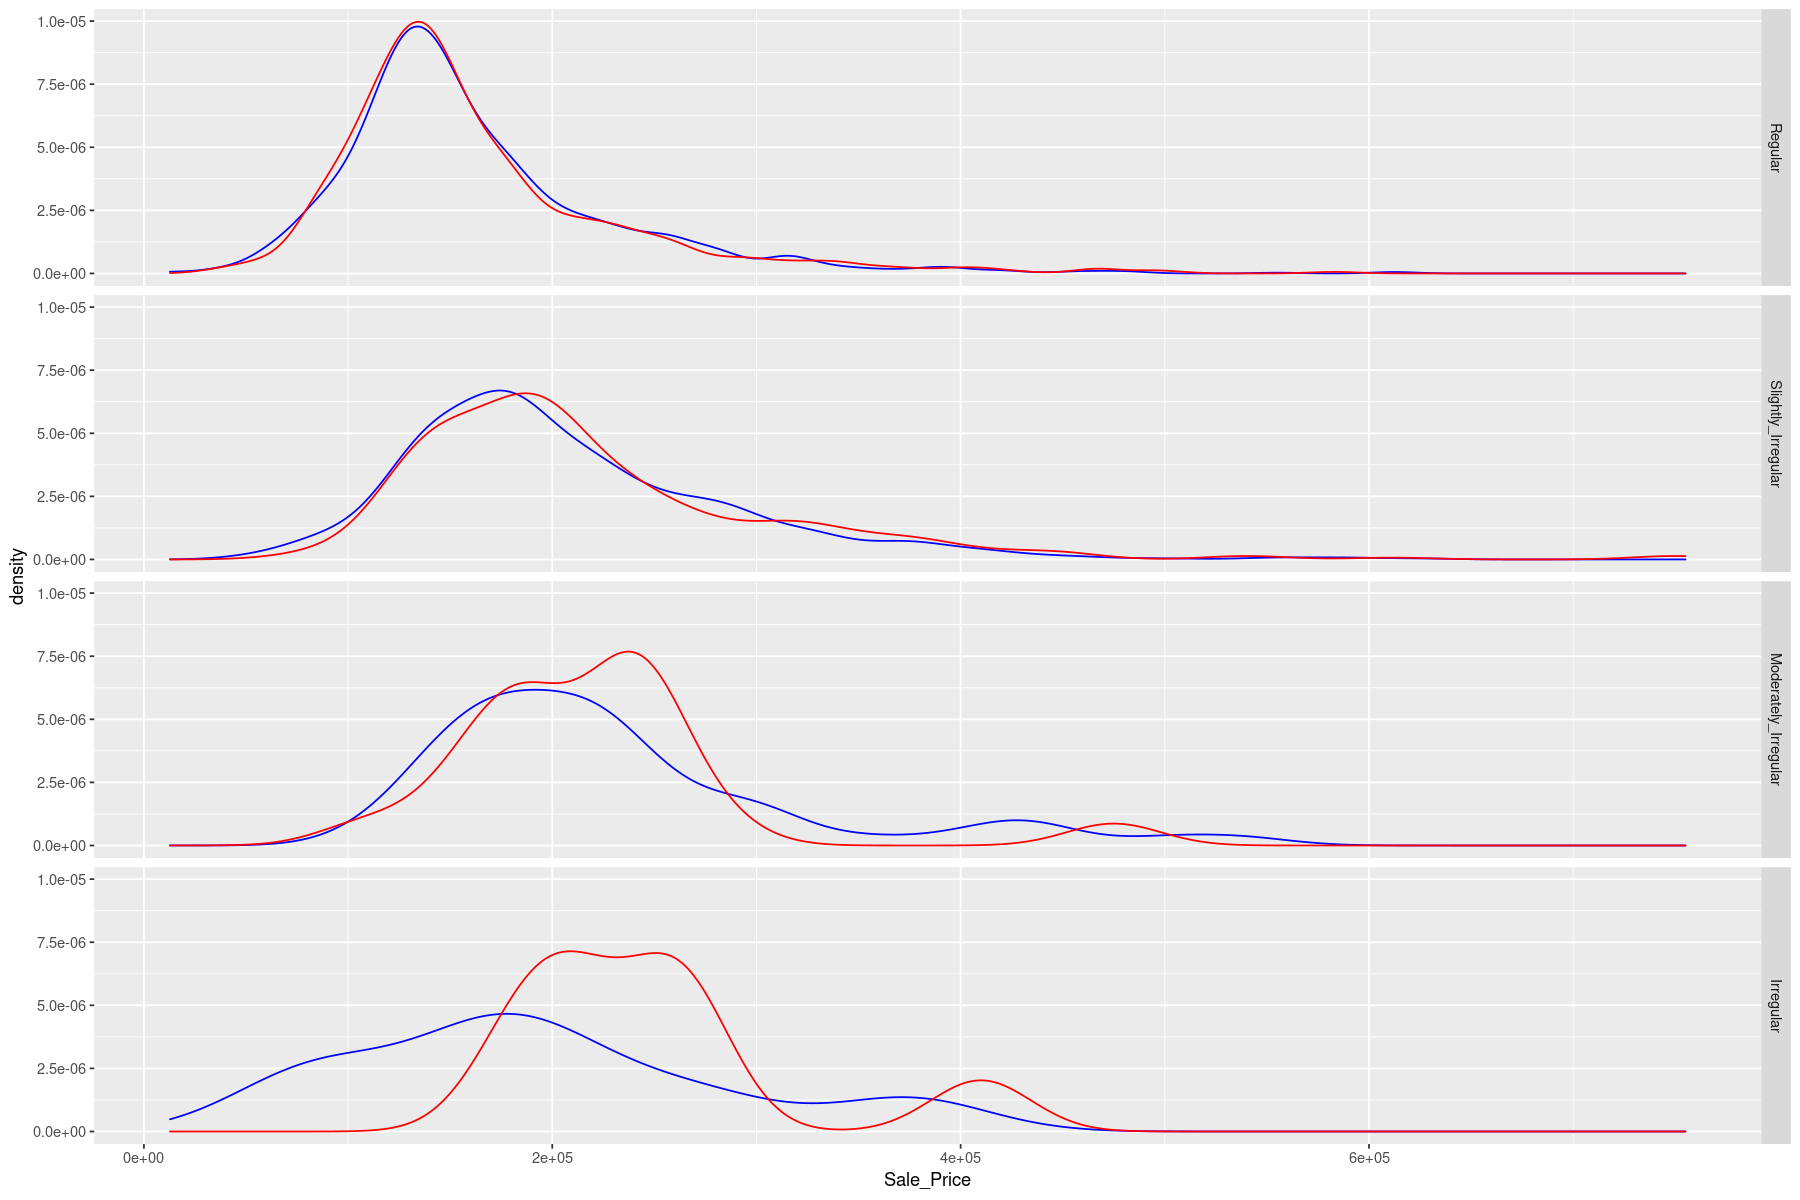

In [20]:
ggplot() + 
    geom_density(data=train_2, aes(Sale_Price), color='blue') + 
    geom_density(data=test_2, aes(Sale_Price), color='red') + 
    facet_grid(rows = vars(Lot_Shape))

# Modeling
R tiene un aplio abanico de librerias que implementan diferentes tipos de modelos e incluso varias implementaciones del mismo modelo pero con diferentes enfoques. Ademas de estos hay librerias que unifican estas para agilizar el proceso de modelo y standarizar los procesos.

Hay diferentes formas de como se deben pasar la data para entrenar un modelo:
* Clasica de R usando una formula como una expresion sombolica de la relacion de dependencia 
    * `fn(Y ~ X)`
* usando separadamente $Y$, $X$ como argumentos independientes
    * `fn(x = ames[, features], y = ames$Sale_Price)`
* usando separadamente $Y$, $X$ pero pasando solo el nombre de las variables de un dataframe 
    * `fn(x = c("Year_Sold", "Longitude", "Latitude"), y = "Sale_Price", data = ames.h2o)`



## Engines
Como se mencion anteriormente hay varias librerias que implementan por ejemplo el mismo modelo pero con diferente sabpres, estos son conocidos como "engines"

[classic linear models](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm)

In [71]:
lm_lm <- lm(Sale_Price ~ ., data = ames)
summary(lm_lm)


Call:
lm(formula = Sale_Price ~ ., data = ames)

Residuals:
    Min      1Q  Median      3Q     Max 
-303624   -9147      83    8942  145991 

Coefficients: (7 not defined because of singularities)
                                                       Estimate Std. Error
(Intercept)                                          -9.836e+06  9.004e+06
MS_SubClassOne_Story_1945_and_Older                   4.293e+03  2.909e+03
MS_SubClassOne_Story_with_Finished_Attic_All_Ages     1.194e+04  9.840e+03
MS_SubClassOne_and_Half_Story_Unfinished_All_Ages     1.222e+04  1.159e+04
MS_SubClassOne_and_Half_Story_Finished_All_Ages       7.603e+03  5.291e+03
MS_SubClassTwo_Story_1946_and_Newer                  -1.722e+02  4.575e+03
MS_SubClassTwo_Story_1945_and_Older                   8.881e+03  5.042e+03
MS_SubClassTwo_and_Half_Story_All_Ages               -1.657e+03  8.694e+03
MS_SubClassSplit_or_Multilevel                       -9.774e+03  8.861e+03
MS_SubClassSplit_Foyer                             

[Generalized Linear Models](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/glm)

In [72]:
lm_glm <- glm(Sale_Price ~ ., data = ames, family = gaussian)
summary(lm_glm)


Call:
glm(formula = Sale_Price ~ ., family = gaussian, data = ames)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-303624    -9147       83     8942   145991  

Coefficients: (7 not defined because of singularities)
                                                       Estimate Std. Error
(Intercept)                                          -9.836e+06  9.004e+06
MS_SubClassOne_Story_1945_and_Older                   4.293e+03  2.909e+03
MS_SubClassOne_Story_with_Finished_Attic_All_Ages     1.194e+04  9.840e+03
MS_SubClassOne_and_Half_Story_Unfinished_All_Ages     1.222e+04  1.159e+04
MS_SubClassOne_and_Half_Story_Finished_All_Ages       7.603e+03  5.291e+03
MS_SubClassTwo_Story_1946_and_Newer                  -1.722e+02  4.575e+03
MS_SubClassTwo_Story_1945_and_Older                   8.881e+03  5.042e+03
MS_SubClassTwo_and_Half_Story_All_Ages               -1.657e+03  8.694e+03
MS_SubClassSplit_or_Multilevel                       -9.774e+03  8.861e+03
MS_SubClass

 [Caret -> meta engine (aggregator)](http://topepo.github.io/caret/train-models-by-tag.html#linear-regression)

In [75]:
lm_caret <- train(Sale_Price ~ ., data = ames, method = "lm")
summary(lm_caret)

Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFi


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-303624   -9147      83    8942  145991 

Coefficients: (9 not defined because of singularities)
                                                       Estimate Std. Error
(Intercept)                                          -9.836e+06  9.004e+06
MS_SubClassOne_Story_1945_and_Older                   4.293e+03  2.909e+03
MS_SubClassOne_Story_with_Finished_Attic_All_Ages     1.194e+04  9.840e+03
MS_SubClassOne_and_Half_Story_Unfinished_All_Ages     1.222e+04  1.159e+04
MS_SubClassOne_and_Half_Story_Finished_All_Ages       7.603e+03  5.291e+03
MS_SubClassTwo_Story_1946_and_Newer                  -1.722e+02  4.575e+03
MS_SubClassTwo_Story_1945_and_Older                   8.881e+03  5.042e+03
MS_SubClassTwo_and_Half_Story_All_Ages               -1.657e+03  8.694e+03
MS_SubClassSplit_or_Multilevel                       -9.774e+03  8.861e+03
MS_SubClassSplit_Foyer                               -

In [84]:
# Example using h2o
x = c("MS_SubClass", "MS_Zoning", "Lot_Frontage", "Lot_Area", "Street", "Alley", "Lot_Shape", "Land_Contour", "Utilities", "Lot_Config", "Land_Slope", "Neighborhood", "Condition_1", "Condition_2", "Bldg_Type", "House_Style", "Overall_Qual", "Overall_Cond", "Year_Built", "Year_Remod_Add", "Roof_Style", "Roof_Matl", "Exterior_1st", "Exterior_2nd", "Mas_Vnr_Type", "Mas_Vnr_Area", "Exter_Qual", "Exter_Cond", "Foundation", "Bsmt_Qual", "Bsmt_Cond", "Bsmt_Exposure", "BsmtFin_Type_1", "BsmtFin_SF_1", "BsmtFin_Type_2", "BsmtFin_SF_2", "Bsmt_Unf_SF", "Total_Bsmt_SF", "Heating", "Heating_QC", "Central_Air", "Electrical", "First_Flr_SF", "Second_Flr_SF", "Low_Qual_Fin_SF", "Gr_Liv_Area", "Bsmt_Full_Bath", "Bsmt_Half_Bath", "Full_Bath", "Half_Bath", "Bedroom_AbvGr", "Kitchen_AbvGr", "Kitchen_Qual", "TotRms_AbvGrd", "Functional", "Fireplaces", "Fireplace_Qu", "Garage_Type", "Garage_Finish", "Garage_Cars", "Garage_Area", "Garage_Qual", "Garage_Cond", "Paved_Drive", "Wood_Deck_SF", "Open_Porch_SF", "Enclosed_Porch", "Three_season_porch", "Screen_Porch", "Pool_Area", "Pool_QC", "Fence", "Misc_Feature", "Misc_Val", "Mo_Sold", "Year_Sold", "Sale_Type", "Sale_Condition", "Longitude", "Latitude")
h2o.cv <- h2o.glm(
  x = x, 
  y = "Sale_Price", 
  training_frame = train_4,
  nfolds = 10  # perform 10-fold CV
)

In [77]:
?h2o.glm

## all together

In [41]:
# Specify resampling strategy
cv <- trainControl(
  method = "repeatedcv", 
  number = 10, 
  repeats = 5                
)

# Create grid of hyperparameter values
hyper_grid <- expand.grid(k = seq(2, 25, by = 4))

# Tune a knn model using grid search
knn_fit <- train(
  Sale_Price ~ ., 
  data = train_2, 
  method = "knn", 
  trControl = cv, 
  tuneGrid = hyper_grid,
  metric = "RMSE"
)
knn_fit

Warning message in train.default(x, y, weights = w, ...):
“The metric "RMSLE" was not in the result set. RMSE will be used instead.”


k-Nearest Neighbors 

2053 samples
  80 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1848, 1847, 1848, 1847, 1848, 1847, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   2  45485.76  0.6630989  30411.20
   6  42471.53  0.7044068  28458.65
  10  43250.59  0.6985047  28882.04
  14  43439.70  0.7038529  28979.50
  18  44060.25  0.7027594  29311.53
  22  44841.12  0.6976862  29782.69

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 6.

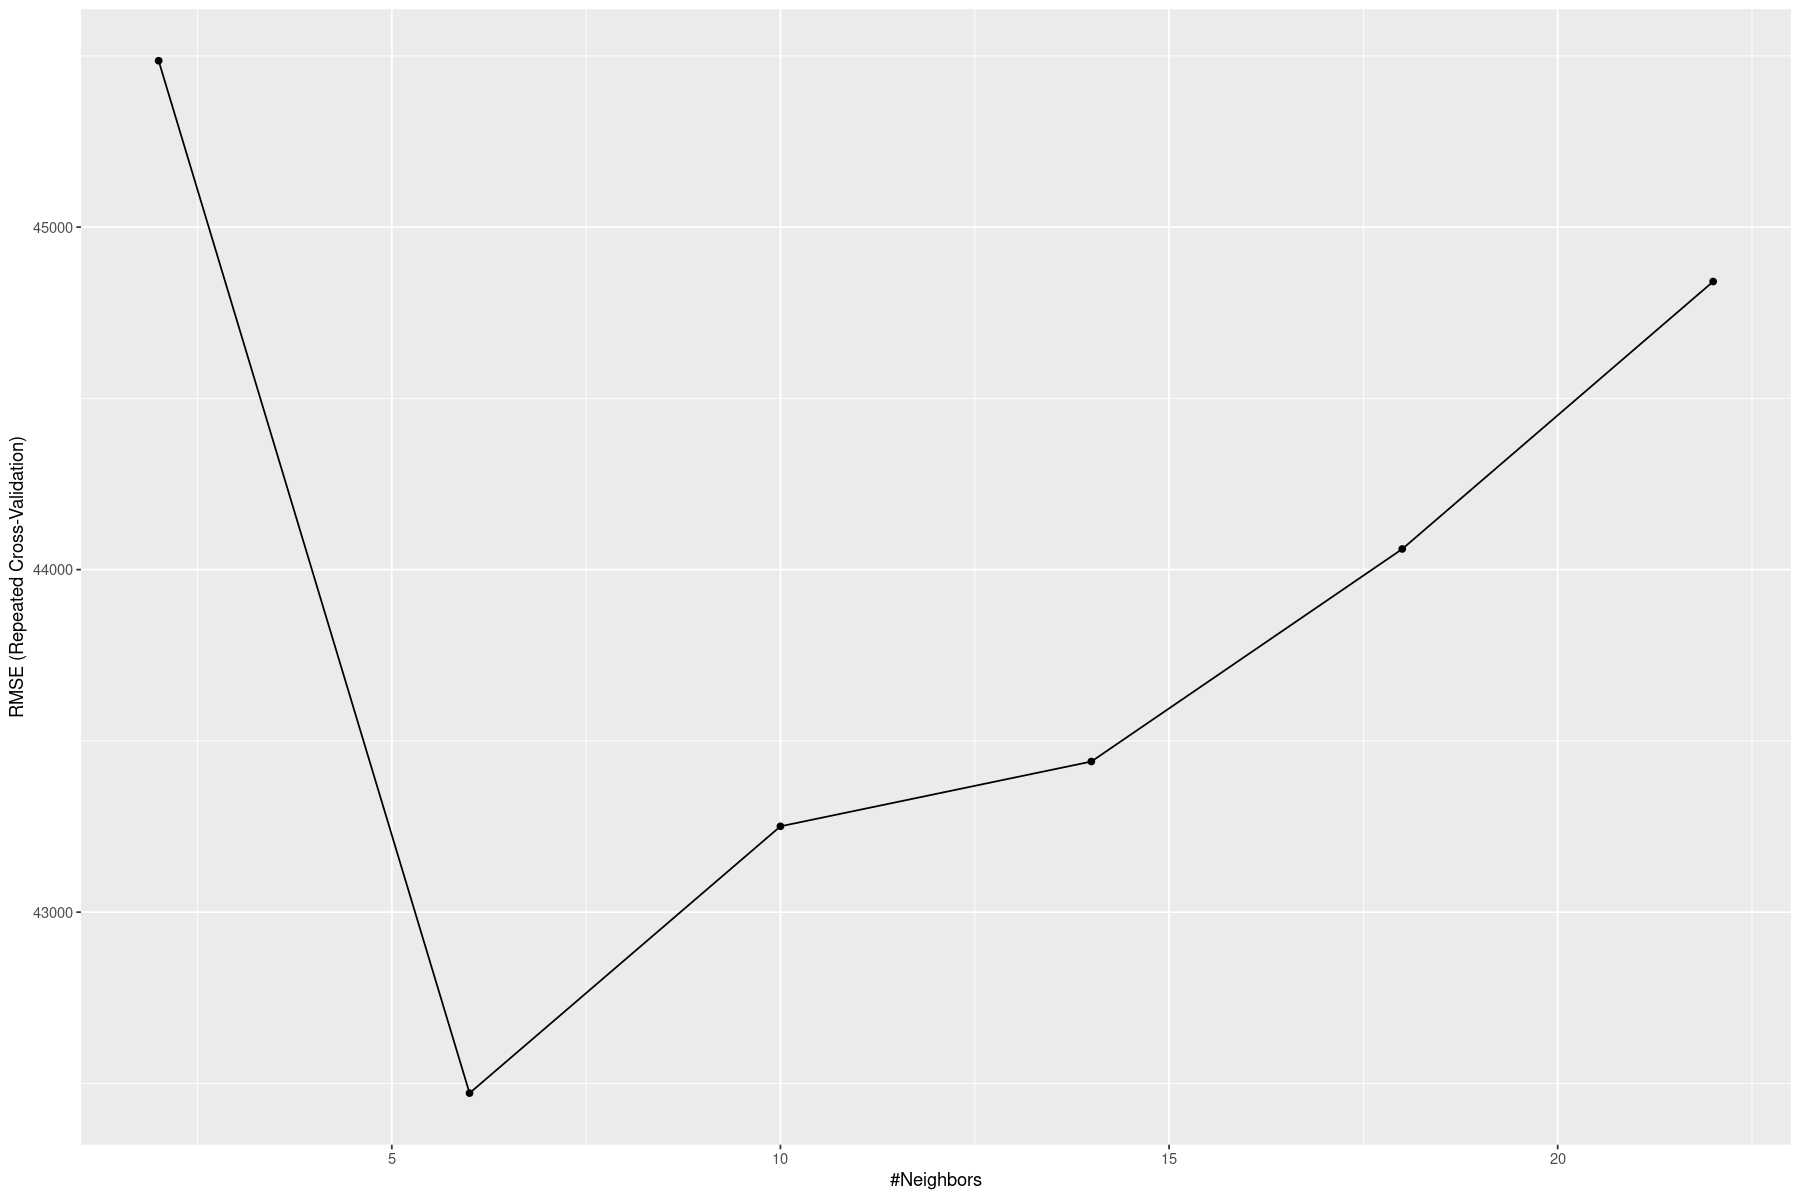

In [44]:
ggplot(knn_fit)


## Feature engineering

In [46]:
# log transformation
ames_recipe <- recipe(Sale_Price ~ ., data = train_2) %>%
  step_log(all_outcomes()) # step_log1p()

In [50]:
ames_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         80

Operations:

Log transformation on all_outcomes()

In [41]:
# Specify resampling strategy
cv <- trainControl(
  method = "repeatedcv", 
  number = 10, 
  repeats = 5                
)

# Create grid of hyperparameter values
hyper_grid <- expand.grid(k = seq(2, 25, by = 4))

# Tune a knn model using grid search
knn_fit <- train(
  Sale_Price ~ ., 
  data = train_2, 
  method = "knn", 
  trControl = cv, 
  tuneGrid = hyper_grid,
  metric = "RMSE"
)
knn_fit

Warning message in train.default(x, y, weights = w, ...):
“The metric "RMSLE" was not in the result set. RMSE will be used instead.”


k-Nearest Neighbors 

2053 samples
  80 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1848, 1847, 1848, 1847, 1848, 1847, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   2  45485.76  0.6630989  30411.20
   6  42471.53  0.7044068  28458.65
  10  43250.59  0.6985047  28882.04
  14  43439.70  0.7038529  28979.50
  18  44060.25  0.7027594  29311.53
  22  44841.12  0.6976862  29782.69

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 6.

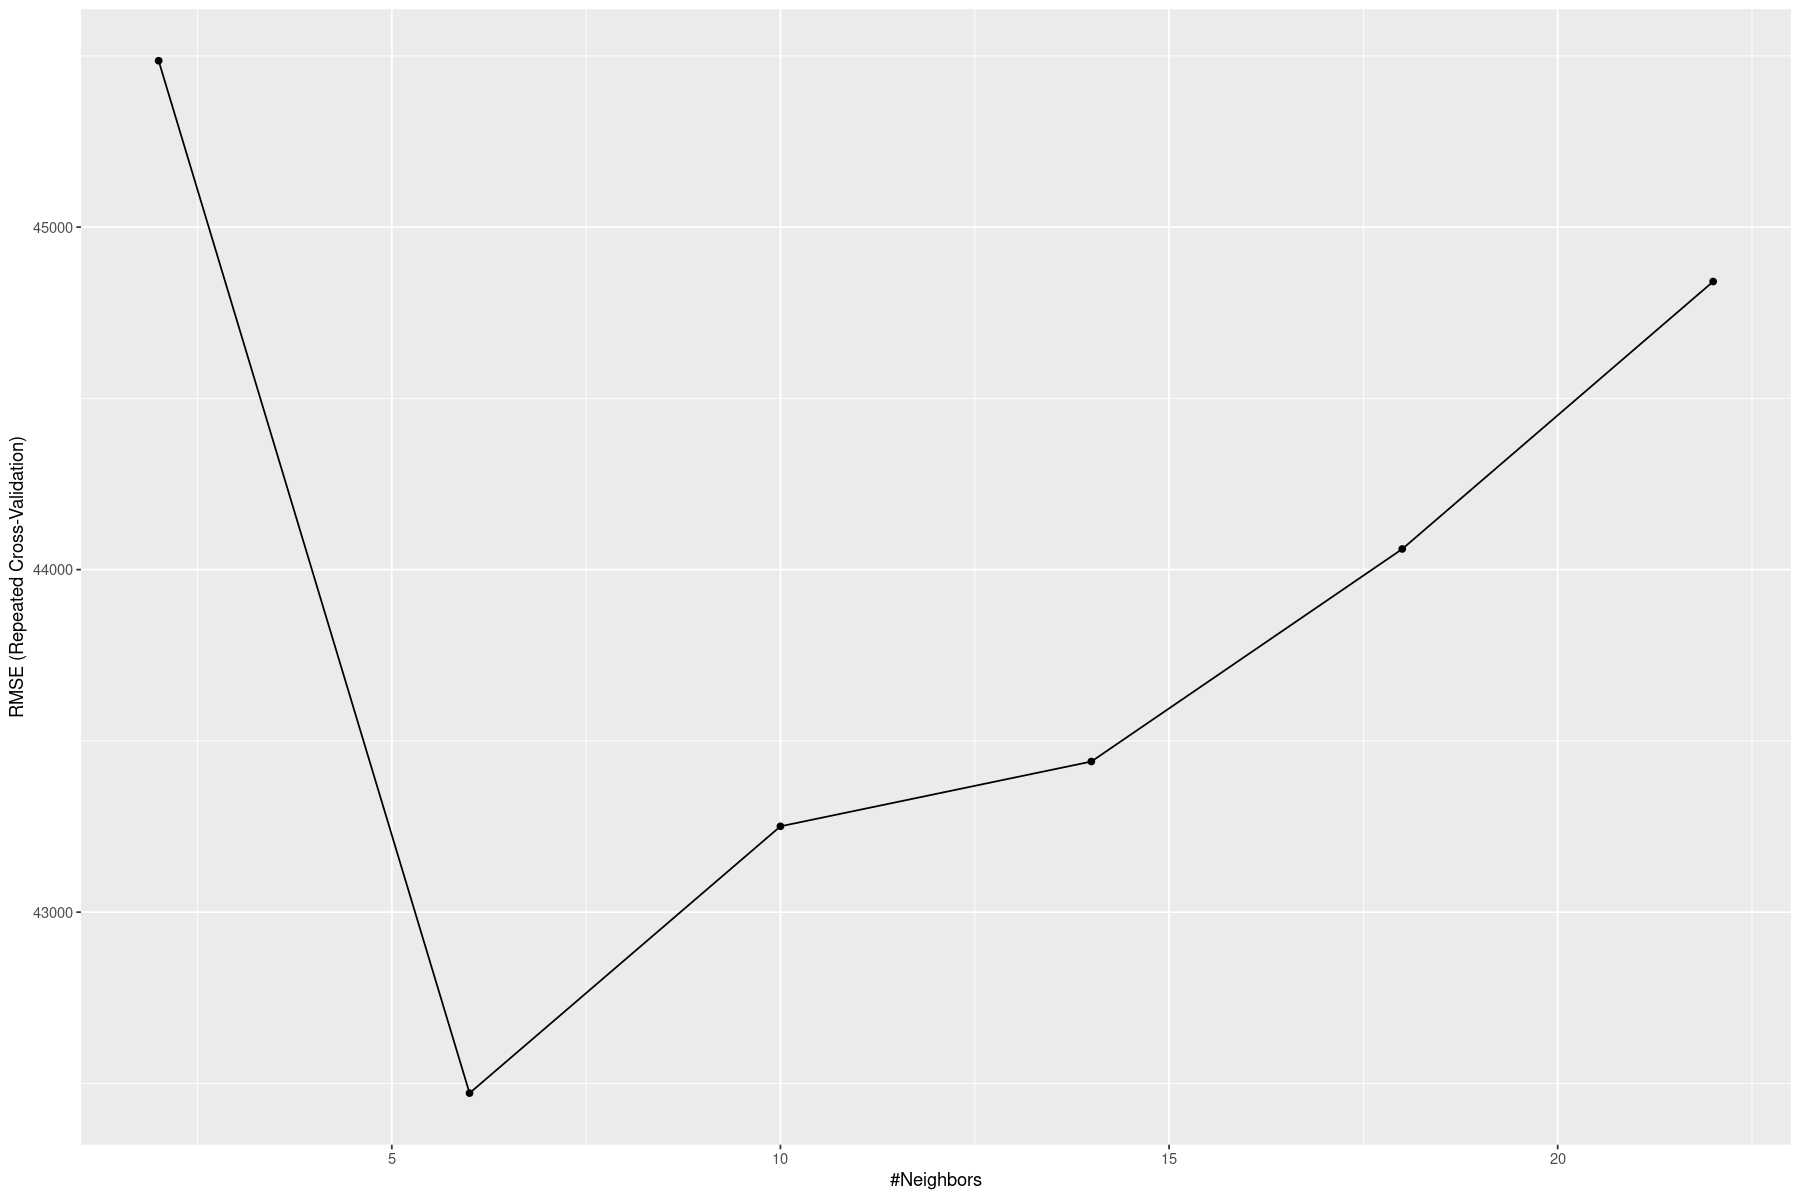

In [44]:
ggplot(knn_fit)


# References
* https://bradleyboehmke.github.io/HOML/engineering.html#ref-zheng2018feature
* http://127.0.0.1:8888/?token=3375b88fca2356e2b198a60ee4304026797506f311b68183
